In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [8]:
# ==========================================================
# 1. MEMBACA CITRA DIGITAL
# ==========================================================

image_path = "foto1.jpeg"  # ganti jika nama berbeda
img = cv2.imread(image_path)

if img is None:
    raise Exception("Gambar tidak ditemukan! Periksa nama file.")

# konversi warna BGR → RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print("\n====================================")
print("Nama      : Ahmad Zaki")
print("Nim       : 24343080")
print("Matakuliah: Pengelolahan Citra Digital")

print("CITRA BERHASIL DIBACA")
print("====================================")


Nama      : Ahmad Zaki
Nim       : 24343080
Matakuliah: Pengelolahan Citra Digital
CITRA BERHASIL DIBACA


In [9]:
# ==========================================================
# 2. REPRESENTASI MATRIKS & VEKTOR
# ==========================================================

print("\n===== MATRlKS 5x5 PIKSEL PERTAMA =====")
print(img_rgb[:5, :5])

vector = img_rgb.flatten()

print("\n===== VEKTOR (20 NILAI PERTAMA) =====")
print(vector[:20])


===== MATRlKS 5x5 PIKSEL PERTAMA =====
[[[ 92  84  63]
  [ 98  90  69]
  [107  99  80]
  [113 105  86]
  [114 105  88]]

 [[ 94  86  65]
  [ 99  91  70]
  [107  99  80]
  [112 104  85]
  [112 103  86]]

 [[ 97  89  70]
  [101  93  74]
  [107  99  80]
  [111 103  84]
  [110 101  84]]

 [[103  95  76]
  [105  97  78]
  [109 101  82]
  [111 103  84]
  [109 100  83]]

 [[108 100  81]
  [109 101  82]
  [110 101  84]
  [110 101  84]
  [106  97  82]]]

===== VEKTOR (20 NILAI PERTAMA) =====
[ 92  84  63  98  90  69 107  99  80 113 105  86 114 105  88 109 100  83
 101  92]


In [10]:
# ==========================================================
# 3. ANALISIS PARAMETER CITRA
# ==========================================================

height, width, channels = img_rgb.shape
resolution = f"{width} x {height}"
aspect_ratio = width / height

bit_depth = img_rgb.dtype.itemsize * 8
intensity_levels = 2 ** bit_depth
total_bit_pixel = bit_depth * channels

memory_bytes = img_rgb.nbytes
memory_kb = memory_bytes / 1024
memory_mb = memory_kb / 1024

# simulasi perubahan
new_width = width * 2
new_height = height * 2
new_bit_pixel = total_bit_pixel / 2

new_memory_bytes = new_width * new_height * (new_bit_pixel/8)
new_memory_mb = new_memory_bytes / 1024 / 1024

print("\n====================================")
print("ANALISIS PARAMETER CITRA")
print("====================================")
print("Resolusi           :", resolution)
print("Tinggi             :", height)
print("Lebar              :", width)
print("Channel warna      :", channels)
print("Bit depth/channel  :", bit_depth)
print("Total bit/pixel    :", total_bit_pixel)
print("Jumlah intensitas  :", intensity_levels)
print("Aspect Ratio       :", round(aspect_ratio,3))
print("Ukuran memori      :", round(memory_mb,2), "MB")

print("\n--- SIMULASI PERUBAHAN ---")
print("Resolusi baru      :", new_width,"x",new_height)
print("Bit baru/pixel     :", new_bit_pixel)
print("Memori baru        :", round(new_memory_mb,2),"MB")



ANALISIS PARAMETER CITRA
Resolusi           : 720 x 1280
Tinggi             : 1280
Lebar              : 720
Channel warna      : 3
Bit depth/channel  : 8
Total bit/pixel    : 24
Jumlah intensitas  : 256
Aspect Ratio       : 0.562
Ukuran memori      : 2.64 MB

--- SIMULASI PERUBAHAN ---
Resolusi baru      : 1440 x 2560
Bit baru/pixel     : 12.0
Memori baru        : 5.27 MB


In [11]:
# ==========================================================
# 4. MANIPULASI CITRA
# ==========================================================

# crop aman (tengah otomatis)
h_mid = height//2
w_mid = width//2
cropped = img_rgb[h_mid-200:h_mid+200, w_mid-200:w_mid+200]

# resize
resized = cv2.resize(img_rgb, (width//2, height//2))

# rotasi
rotated = cv2.rotate(img_rgb, cv2.ROTATE_90_CLOCKWISE)

# flip
flipped = cv2.flip(img_rgb,1)

print("\n====================================")
print("UKURAN SETELAH MANIPULASI")
print("====================================")
print("Original :", img_rgb.shape)
print("Crop     :", cropped.shape)
print("Resize   :", resized.shape)
print("Rotate   :", rotated.shape)
print("Flip     :", flipped.shape)


UKURAN SETELAH MANIPULASI
Original : (1280, 720, 3)
Crop     : (400, 400, 3)
Resize   : (640, 360, 3)
Rotate   : (720, 1280, 3)
Flip     : (1280, 720, 3)


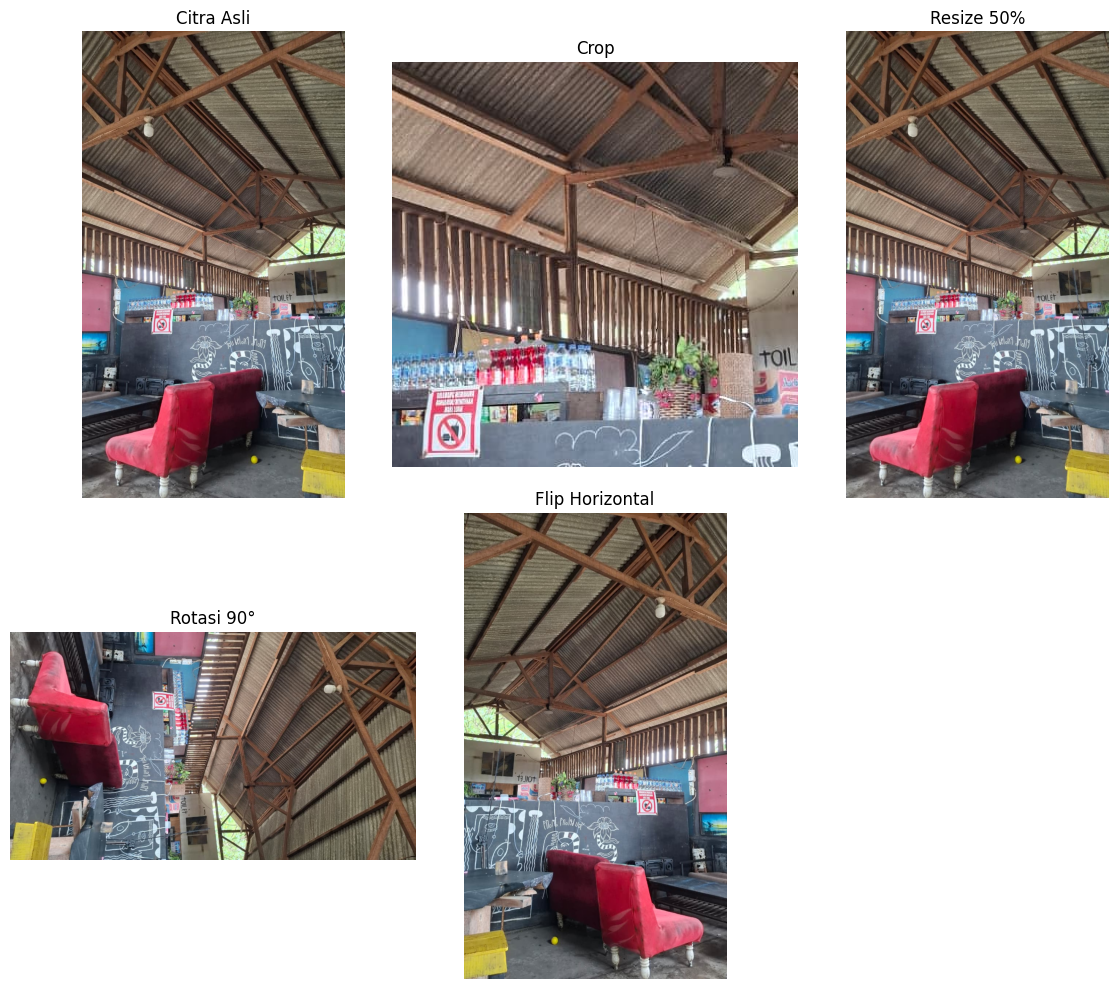

In [12]:
# ==========================================================
# 5. VISUALISASI HASIL
# ==========================================================

plt.figure(figsize=(12,10))

plt.subplot(2,3,1)
plt.title("Citra Asli")
plt.imshow(img_rgb)
plt.axis("off")

plt.subplot(2,3,2)
plt.title("Crop")
plt.imshow(cropped)
plt.axis("off")

plt.subplot(2,3,3)
plt.title("Resize 50%")
plt.imshow(resized)
plt.axis("off")

plt.subplot(2,3,4)
plt.title("Rotasi 90°")
plt.imshow(rotated)
plt.axis("off")

plt.subplot(2,3,5)
plt.title("Flip Horizontal")
plt.imshow(flipped)
plt.axis("off")

plt.tight_layout()
plt.show()